### At what temperature does cooling of the neutral medium starts being dominated by collisionally excited Hydrogen line emission?

Most of the cooling in the neutral medium comes from CELs, in particular [CII]. Assuming that the ionisation fraction is low, such that the [CII] is primarily excited by collisions with H atoms, the cooling function is: 

$\Lambda_{[CII]} = 0.06 \left( \frac{T}{100} \right)^{0.13} e^{-92/T}$, 

where $\Lambda_{[CII]}$ is in units of $10^{-25}$ erg cm$^3$ s$^{-1}$.

Cooling from Ly$\alpha$ is given by:
$\Lambda_{Ly\alpha} = 7000 \left( \frac{x_e}{10^{-3}} \right) \left( \frac{T}{8000} \right)^{-0.5} e^{-118,000/T}$, 

where $x_e$ is the ionisation fraction. For this problem, we will assume that $x_e\sim10^{-3}$, meaning that term of the equation can be ignored. 

The Ly$\alpha$ cooling will start to dominate when $\Lambda_{Ly\alpha} > \Lambda_{[CII]}$, so we need to find at which temperature this occurs. 


Let's find the temperature $T$ where $\Lambda_{Ly\alpha} = \Lambda_{[CII]}$:

$\Lambda_{Ly\alpha} = \Lambda_{[CII]}$

$\frac{0.06}{100^{0.13}} T^{0.13} e^{-92/T} = \frac{7000}{8000^{-0.5}} e^{-118,000/T}$

$9.026\times10^{-8} T^{0.63} = (e^{1/T})^{-117908}$

Let's define the following to avoid having to carry these numbers: 

In [1]:
# Importing the packages we'll need further down 
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 9.026E-08
b = 0.63
c = -117908

The equation then is $aT^b = (e^{1/T})^c$ 

We then take the power of $1/c$ on each side, followed by taking the natural logarith, which gives: 

$\ln a^{1/c} + \frac{b}{c}\ln T = \frac{1}{T}$

Again to simplify things, we'll define the following variables: 

In [3]:
u = np.log(a**(1/c))
v = b/c

Making this substitution, we have the following function 

$f(T) = u - \frac{1}{T} + v\ln T$

To solve our problem, we need to find the value of $T$ such that $f(T)=0$

There is no obvious way of analytically finding the roots of this equation, so we have two choices: 

(1) if we can make a reasonable guess for what we expect $T$ to be when Ly$\alpha$ starts to dominate over [CII] cooling, we can use Newton's method 

(2) we can numerically solve the equation. 

Let's try both of these methods here. 

#### (1) Using Newton's method to estimate the solution

The method states that if we can make a decent first guess of the solution, we can iteratively converge to the real solution by doing: 

$T_{k+1} = T_k - \frac{f(T_k)}{f\prime(T_k)}$

We know from first principles that the lowest temperature Ly$\alpha$ could possibly start acting as a cooling agent is 8000K, so let's make a first guess that the cross-over temperature (where it takes over form [CII] as the main coolant) will be at about 10000K. 

We will also need the first derivative of our function, which in this case is: 

$f\prime(T) = \frac{1}{T^2} + \frac{v}{T}$

Our first guess is $T_0 = 10000$~K, and the first iteration will therefore be: 
$T_{1} = T_0 - \frac{f(T_k)}{f\prime(T_k)}$


This can be done straightforwardly by hand, but since we're in a Jupyter Notebook, we'll let Python do the calculation for us :) 

First we define functions for $f(T)$ and $f\prime(T)$:  

In [4]:
def fn(x):
    fn = u - 1/x + v*np.log(x)
    return(fn)

In [5]:
def fnp(x):
    fnp = 1/x**2 + v/x
    return(fnp)

Let's use our initial guess and perform the first iteration using Newton's formula:

In [6]:
T0 = 10000.0
T1 = T0 - fn(T0)/fnp(T0)
print('initial guess: ',T0,' K')
print('first iteration: ',T1,' K')

initial guess:  10000.0  K
first iteration:  11229.968274494136  K


If you were doing this by hand, you could stop here, or to convince yourself that your initial guess was sensible, you could do a few more iterations to see if you are converging: 

In [7]:
# Try a second iteration to see if we have nearly converged 
T2 = T1 - fn(T1)/fnp(T1)
T3 = T2 - fn(T2)/fnp(T2)
T4 = T3 - fn(T3)/fnp(T3)
print('second iteration: ',T2,' K')
print('third iteration: ',T3,' K')
print('fourth iteration: ',T4,' K')

second iteration:  11405.687295255482  K
third iteration:  11408.571400582918  K
fourth iteration:  11408.572153739036  K


The answer to our prolem is that under the assumptions made about the specific density and ionisation state of the ISM (which are built into the cooling functions I gave you), cooling via Ly$\alpha$ will start to dominate over [CII] if the temperature exceeds 11408K. 

#### (2) Numerical and graphic solution 

The above is a perfectly good solution, and we could stop there, but since we're here let's plot the two cooling curves and find a numerical solution. 

In [8]:
# Defining a temperature array, from 10-20000K, with steps of 1K 
T = np.arange(10.,20000.,1.)

# Writing down the two cooling functions
GCII = 0.06 * (T/100.)**0.13 * np.exp(-91.2/T) 
GLya = 7000.0 * (T/8000.)**-0.5 * np.exp(-118000.0/T) 

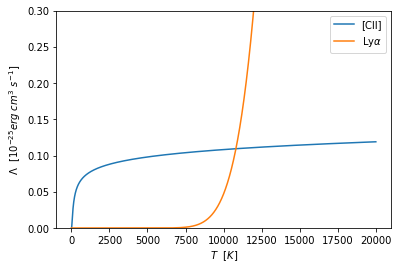

In [9]:
# Plotting the two cooling functions

plt.ylim([0,0.3])
plt.plot(T,GCII, label='[CII]')
plt.plot(T,GLya, label=r'Ly$\alpha$')
plt.xlabel(r'$T~~[K]$')
plt.ylabel(r'$\Lambda~~[10^{-25} erg~cm^3~s^{-1}]$')
plt.legend()


As expected, we see that the Ly$\alpha$ cooling really only kicks in at $\sim 8000$K, and takes over from [CII] at $T \sim 10000 $K. 

We can also find the numerical solution by looking for the value of T in our array that produces the value of $f(T)$ closest to 0.0

In [10]:
f = u - 1/T + v*np.log(T)
print('T=',T[np.argmin(np.abs(f))],' K')

T= 11409.0  K


And we see how we recover the same answer as with our estimation above. To get higher accuracy here, we should define the array T with a higher sampling, or use a more advanced method to find the numerical solution (not necessary here)